# Reshuffling

In [1]:


from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
import time
from copy import copy, deepcopy
import numpy as np
import matplotlib.pyplot as plt
import time




In [2]:


Dict = {
    
    # Parameters shared with the perfect foresight model
    "Rfree": 1.04**.25,                   # Interest factor on assets
    "LivPrb" : [.99375],                     # Survival probability
    "PermGroFac" :[1.00],                 # Permanent income growth factor

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" :  [.06],                 # Standard deviation of log permanent shocks to income
    "PermShkCount" : 7,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [.2],                   # Standard deviation of log transitory shocks to income
    "TranShkCount" : 7,                    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0.1,                     # Probability of unemployment while working


    # Parameters only used in simulation
    "T_sim" : 3000,                       # Number of periods to simulate
    #"aNrmInitMean" : np.log(0.0),,#np.log(0.0),# Mean of log initial assets , 
    "aNrmInitMean": -6.0,  # Mean of log initial assets
    "aNrmInitStd": 1.0,  # Standard deviation of log initial assets

    "reshuffle": True,
    
     }



In [3]:
Dict_no_reshuffle = deepcopy(Dict)
Dict_no_reshuffle['reshuffle'] = False
example1 = IndShockConsumerType(**Dict)
example1.cycles = 0

example1_no_reshuffle = IndShockConsumerType(**Dict_no_reshuffle)
example1_no_reshuffle.cycles = 0
example1_no_reshuffle.reshuffle = False
example1.solve()
example1_no_reshuffle.solve()

GPFRaw                 = 0.984611 
GPFNrm                 = 0.987928 
GPFAggLivPrb           = 0.978457 
Thorn = APF            = 0.984611 
PermGroFacAdj          = 0.996642 
uInvEpShkuInv          = 0.996642 
VAF                    = 0.950797 
WRPF                   = 0.307358 
DiscFacGPFNrmMax       = 0.983604 
DiscFacGPFAggLivPrbMax = 0.996471 
GPFRaw                 = 0.984611 
GPFNrm                 = 0.987928 
GPFAggLivPrb           = 0.978457 
Thorn = APF            = 0.984611 
PermGroFacAdj          = 0.996642 
uInvEpShkuInv          = 0.996642 
VAF                    = 0.950797 
WRPF                   = 0.307358 
DiscFacGPFNrmMax       = 0.983604 
DiscFacGPFAggLivPrbMax = 0.996471 


In [4]:
def get_mult_fac(prb):
    i = 0
    while isinstance(prb,float):
        prb = prb*10
        i += 1
        if (abs(prb - round(prb)))<(1e-10):
            break
            
    return i
if example1.UnempPrb>0:
    
    potential_fac = 1/example1.UnempPrb
else:
    potential_fac = 1.0
    
if (potential_fac).is_integer() ==True:
    fac = potential_fac
else:
    i_1 = get_mult_fac(example1.UnempPrb)
    fac = 10**i_1

def check_and_convert_to_int(val):

    if abs(round(val) - val) < 1e-6:
        return abs(round(val))
    
lcm = (example1.PermShkCount * example1.TranShkCount) * fac # minimum multiple for both the newborns and and oldborns individuals

lcm = int(lcm) 
#AgentCount = check_and_convert_to_int(lcm/(1-example1.LivPrb[0])) # total number of agents
AgentCount = lcm 
print(AgentCount)



490


In [5]:

# Simulation Parameters 
#Simulate
example1.AgentCount = AgentCount 
example1.track_vars = ['aLvl','cNrm', 'TranShk' , 'pLvl'] # Track level of assets
example1.initialize_sim()
example1.simulate() #Simulate with Monte Carlo

#Compute Aggregate Consumption and Aggregate Assets
Monte_Carlo_Consumption = np.mean((example1.state_now['mNrm'] - example1.state_now['aNrm'])*example1.state_now['pLvl']) #Aggregate Consumption
Monte_Carlo_Assets = np.mean(example1.state_now['aNrm']*example1.state_now['pLvl']) #Aggregate Assets



In [6]:
Agg_A = []
Agg_C = []
for t in range(example1.T_sim):
    A = np.mean(example1.history['aLvl'][t])
    C = np.mean(example1.history['cNrm'][t]*example1.history['pLvl'][t])

    Agg_A.append(A)
    Agg_C.append(C)


In [7]:
example1_no_reshuffle.AgentCount = AgentCount
example1_no_reshuffle.track_vars = ['aLvl', 'pLvl', 'cNrm', 'TranShk'] # Track level of assets
example1_no_reshuffle.initialize_sim()
example1_no_reshuffle.simulate() #Simulate with Monte Carlo

Agg_A_no_reshuffle = []
Agg_C_no_reshuffle = []

for t in range(example1_no_reshuffle.T_sim):
    A_no_reshuffle = np.mean(example1_no_reshuffle.history['aLvl'][t])
    C_no_reshuffle = np.mean(example1_no_reshuffle.history['cNrm'][t]*example1_no_reshuffle.history['pLvl'][t])

    Agg_A_no_reshuffle.append(A_no_reshuffle)
    Agg_C_no_reshuffle.append(C_no_reshuffle)


In [8]:
print(np.mean(Agg_A_no_reshuffle[100:]))
print(np.mean(Agg_A[100:]))

0.8679193636831609
0.8403488536650551


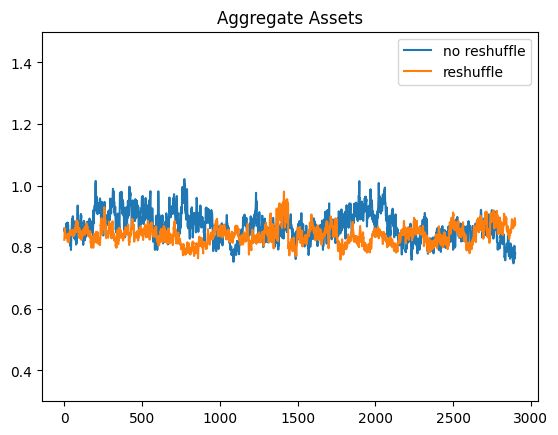

In [9]:
plt.plot(Agg_A_no_reshuffle[100:], label = 'no reshuffle')
plt.plot(Agg_A[100:], label = 'reshuffle')
plt.ylim(0.3,1.5)
plt.title('Aggregate Assets')
plt.legend()

In [10]:
print('standard deviation no reshuffle', np.std(Agg_A_no_reshuffle[100:]))
print('standard deviation with reshuffle' , np.std(Agg_A[100:]))

print('ratio of no reshuffle to reshuffle', np.std(Agg_A_no_reshuffle[100:]) /np.std(Agg_A[100:]) )


standard deviation no reshuffle 0.04556813587082014
standard deviation with reshuffle 0.029672050986557147
ratio of no reshuffle to reshuffle 1.5357258549961605


In [11]:
print('variance no reshuffle', np.var(Agg_A_no_reshuffle[100:]))
print('variance with reshuffle' , np.var(Agg_A[100:]))

print('ratio of no reshuffle to reshuffle', np.var(Agg_A_no_reshuffle[100:]) /np.var(Agg_A[100:]) )


variance no reshuffle 0.002076455006741525
variance with reshuffle 0.0008804306097488469
ratio of no reshuffle to reshuffle 2.358453901703688


(0.8, 1.5)

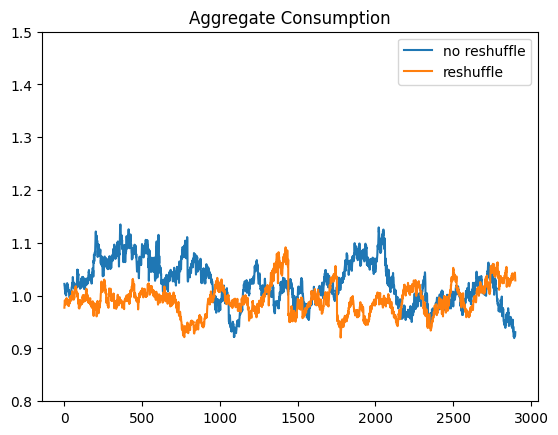

In [12]:
plt.plot(Agg_C_no_reshuffle[100:], label = 'no reshuffle')
plt.plot(Agg_C[100:], label = 'reshuffle')
plt.legend()
plt.title('Aggregate Consumption')
plt.ylim(.8,1.5)


In [13]:
print('variance no reshuffle', np.var(Agg_C_no_reshuffle[100:]))
print('variance with reshuffle' , np.var(Agg_C[100:]))

print('ratio of no reshuffle to reshuffle', np.var(Agg_C_no_reshuffle[100:]) /np.var(Agg_C[100:]) )


variance no reshuffle 0.0017096714891795739
variance with reshuffle 0.0008049080312952917
ratio of no reshuffle to reshuffle 2.124058181440057


In [14]:
Dict_no_reshuffle = deepcopy(Dict)
Dict_no_reshuffle['reshuffle'] = False
example_Harmenberg = IndShockConsumerType(**Dict_no_reshuffle)
example_Harmenberg.cycles = 0
example_Harmenberg.solve()


GPFRaw                 = 0.984611 
GPFNrm                 = 0.987928 
GPFAggLivPrb           = 0.978457 
Thorn = APF            = 0.984611 
PermGroFacAdj          = 0.996642 
uInvEpShkuInv          = 0.996642 
VAF                    = 0.950797 
WRPF                   = 0.307358 
DiscFacGPFNrmMax       = 0.983604 
DiscFacGPFAggLivPrbMax = 0.996471 


In [15]:
example_Harmenberg.neutral_measure = True
example_Harmenberg.AgentCount = AgentCount
example_Harmenberg.track_vars = ['aNrm','cNrm', 'TranShk' , 'pLvl'] # Track level of assets
example_Harmenberg.initialize_sim()
example_Harmenberg.simulate() #Simulate with Monte Carlo

{'aNrm': array([[0.18673842, 0.18778001, 0.18685129, ..., 0.18853899, 0.18923216,
         0.18652782],
        [0.34263865, 0.66416561, 0.39870003, ..., 0.48273589, 0.40043953,
         0.230585  ],
        [0.2405698 , 0.54966661, 0.49386995, ..., 0.866921  , 0.50311378,
         0.25621483],
        ...,
        [1.53373023, 1.19626029, 1.18471462, ..., 0.19904123, 0.98339864,
         1.28378556],
        [1.48583188, 0.54857026, 1.06135142, ..., 0.65820269, 1.24243646,
         1.30799762],
        [1.41333291, 0.69574559, 0.78154583, ..., 0.7872597 , 1.08866033,
         1.41226944]]),
 'cNrm': array([[0.81423508, 0.81496014, 0.81431365, ..., 0.81548847, 0.81597099,
         0.81408848],
        [0.89880926, 0.98981798, 0.9189574 , ..., 0.94403789, 0.91951362,
         0.84163622],
        [0.84773803, 0.96191564, 0.94723374, ..., 1.03181722, 0.94979898,
         0.85653362],
        ...,
        [1.12826238, 1.0845442 , 1.08288642, ..., 0.82235953, 1.05230395,
         1.0966472

In [16]:
Agg_A_Harmenberg = []
Agg_C_Harmenberg = []

for t in range(example1_no_reshuffle.T_sim):
    A_Harm = np.mean(example_Harmenberg.history['aNrm'][t])
    C_Harm = np.mean(example_Harmenberg.history['cNrm'][t])

    Agg_A_Harmenberg.append(A_Harm)
    Agg_C_Harmenberg.append(C_Harm)


In [17]:

example_Harmenberg_reshuffle = IndShockConsumerType(**Dict, verbose = False)
example_Harmenberg_reshuffle.cycles = 0
example_Harmenberg_reshuffle.solve()


In [18]:
example_Harmenberg_reshuffle.neutral_measure = True
example_Harmenberg_reshuffle.AgentCount = AgentCount
example_Harmenberg_reshuffle.track_vars = ['aNrm','cNrm', 'TranShk' , 'pLvl'] # Track level of assets
example_Harmenberg_reshuffle.initialize_sim()
example_Harmenberg_reshuffle.simulate() #Simulate with Monte Carlo

{'aNrm': array([[0.18667494, 0.1877387 , 0.18675973, ..., 0.18871716, 0.18970184,
         0.18652782],
        [0.230669  , 0.29718104, 0.33358091, ..., 0.50083041, 0.        ,
         0.        ],
        [0.70153531, 0.48645491, 0.        , ..., 0.09061339, 0.17534169,
         0.17534169],
        ...,
        [1.42161167, 1.06740389, 0.82704187, ..., 1.77040745, 1.32524052,
         0.01727425],
        [1.26022032, 0.98527749, 1.05449411, ..., 2.14127641, 1.57985465,
         0.23079142],
        [1.28590661, 0.75932705, 0.90545731, ..., 2.31008148, 1.75454486,
         0.69650608]]),
 'cNrm': array([[0.81419089, 0.81493138, 0.81424991, ..., 0.81561249, 0.81629793,
         0.81408848],
        [0.84168756, 0.87863288, 0.89487884, ..., 0.94920467, 0.49191247,
         0.49291813],
        [0.99796922, 0.94510537, 0.60685372, ..., 0.74095135, 0.80630174,
         0.80630174],
        ...,
        [1.11462143, 1.06554292, 1.02400388, ..., 1.1551859 , 1.10211875,
         0.6691191

In [19]:
Agg_A_Harmenberg_reshuffle = []
Agg_C_Harmenberg_reshuffle = []

for t in range(example1_no_reshuffle.T_sim):
    A_Harm_reshuffle = np.mean(example_Harmenberg_reshuffle.history['aNrm'][t])
    C_Harm_reshuffle = np.mean(example_Harmenberg_reshuffle.history['cNrm'][t])

    Agg_A_Harmenberg_reshuffle.append(A_Harm_reshuffle)
    Agg_C_Harmenberg_reshuffle.append(C_Harm_reshuffle)

(0.2, 1.5)

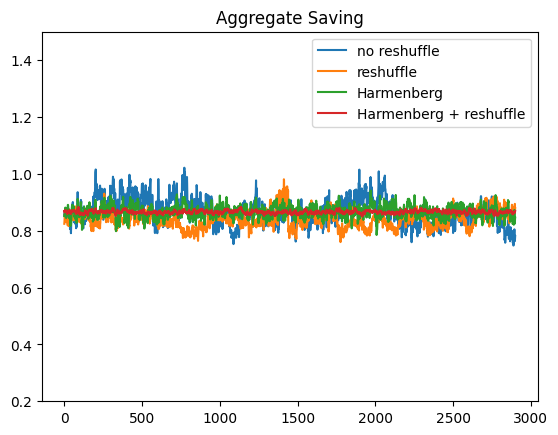

In [20]:
plt.plot(Agg_A_no_reshuffle[100:], label = 'no reshuffle')
plt.plot(Agg_A[100:], label = 'reshuffle')
plt.plot(Agg_A_Harmenberg[100:], label = 'Harmenberg')
plt.plot(Agg_A_Harmenberg_reshuffle[100:], label = 'Harmenberg + reshuffle' )
plt.legend()
plt.title('Aggregate Saving')
plt.ylim(.2,1.5)

In [21]:
#print('variance no reshuffle', np.var(Agg_A_no_reshuffle[100:]))
#print('variance with reshuffle' , np.var(Agg_A[100:]))
#print('variance with Harmenberg' , np.var(Agg_A_Harmenberg[100:]))
#print('variance with Harmenberg + reshuffle' , np.var(Agg_A_Harmenberg_reshuffle[100:]))

print('ratio of no reshuffle to reshuffle', np.var(Agg_A_no_reshuffle[100:]) /np.var(Agg_A[100:]) )
print('ratio of no reshuffle to Harmenberg', np.var(Agg_A_no_reshuffle[100:]) /np.var(Agg_A_Harmenberg[100:]) )
print('ratio of no reshuffle to Harmenberg + reshuffle', np.var(Agg_A_no_reshuffle[100:]) /np.var(Agg_A_Harmenberg_reshuffle[100:]) )


ratio of no reshuffle to reshuffle 2.358453901703688
ratio of no reshuffle to Harmenberg 4.80016490376663
ratio of no reshuffle to Harmenberg + reshuffle 72.31928923323491


(0.8, 1.5)

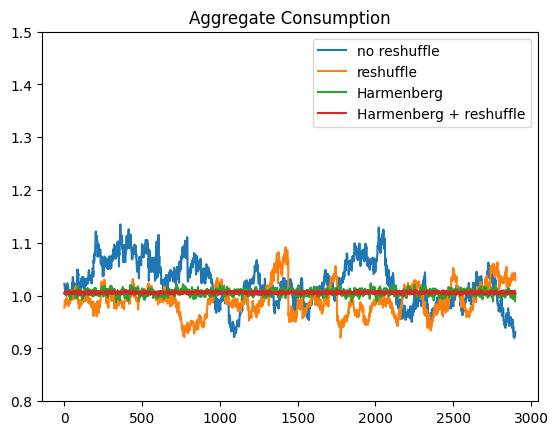

In [22]:
plt.plot(Agg_C_no_reshuffle[100:], label = 'no reshuffle')
plt.plot(Agg_C[100:], label = 'reshuffle')
plt.plot(Agg_C_Harmenberg[100:], label = 'Harmenberg')
plt.plot(Agg_C_Harmenberg_reshuffle[100:], label = 'Harmenberg + reshuffle')
plt.legend()
plt.title('Aggregate Consumption')
plt.ylim(.8,1.5)

In [23]:
print('variance no reshuffle', np.var(Agg_C_no_reshuffle[100:]))
print('variance with reshuffle' , np.var(Agg_C[100:]))
print('variance with Harmenberg' , np.var(Agg_C_Harmenberg[100:]))
print('variance with Harmenberg + reshuffle' , np.var(Agg_C_Harmenberg_reshuffle[100:]))

print('ratio of no reshuffle to reshuffle', np.var(Agg_C_no_reshuffle[100:]) /np.var(Agg_C[100:]) )
print('ratio of no reshuffle to Harmenberg', np.var(Agg_C_no_reshuffle[100:]) /np.var(Agg_C_Harmenberg[100:]) )
print('ratio of no reshuffle to Harmenberg + reshuffle', np.var(Agg_C_no_reshuffle[100:]) /np.var(Agg_C_Harmenberg_reshuffle[100:]) )


variance no reshuffle 0.0017096714891795739
variance with reshuffle 0.0008049080312952917
variance with Harmenberg 2.6170617445114956e-05
variance with Harmenberg + reshuffle 2.9387754075726773e-06
ratio of no reshuffle to reshuffle 2.124058181440057
ratio of no reshuffle to Harmenberg 65.32790037396323
ratio of no reshuffle to Harmenberg + reshuffle 581.7632353850753
